In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
series=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col=0,parse_dates=True)
series

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [4]:
len(series)

42

In [5]:
42//4,42%4

(10, 2)

#### We have the quarterly details of coca cola prices over 10 consecutive years from 85 to 95 along with 2 quarter details of the 11th year 

<AxesSubplot:xlabel='Quarter'>

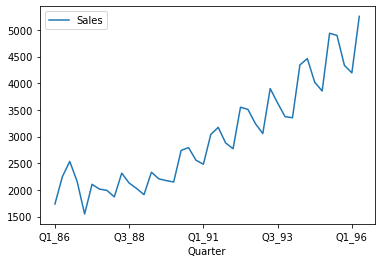

In [6]:
series.plot(use_index=True)

#### Here we see that there is an increasing trend in coca cola prices over the 11 years. 

<AxesSubplot:ylabel='Density'>

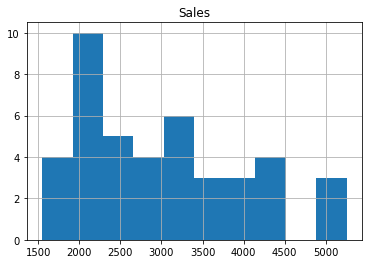

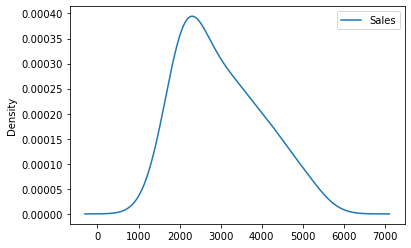

In [7]:
series.hist()
series.plot(kind='kde')

#### Here we get a skewed graph as there is an increasing trend

In [8]:
df=pd.DataFrame()
for i in range(0,41,4):
    
    year=series.index[i]
    end=i+4

    if(i==40):
        last_list=list(data["Sales"][i:])
        last_list.append(0)
        last_list.append(0)
        df[year[3:]]=last_list
        
    else:
        df[year[3:]]=list(data["Sales"][i:end])

df    


,86,87,88,89,90,91,92,93,94,95,96
0,1734.827000,1547.818996,1869.049999,1910.603996,2148.278000,2480.973999,2772.000000,3056.0,3352.0,3854.0,4194.0
1,2244.960999,2104.411995,2313.631996,2331.164993,2739.307999,3039.522995,3550.000000,3899.0,4342.0,4936.0,5253.0
2,2533.804993,2014.362999,2128.320000,2206.549995,2792.753998,3172.115997,3508.000000,3629.0,4461.0,4895.0,0.0
3,2154.962997,1991.746998,2026.828999,2173.967995,2556.009995,2879.000999,3243.859993,3373.0,4017.0,4333.0,0.0


<AxesSubplot:>

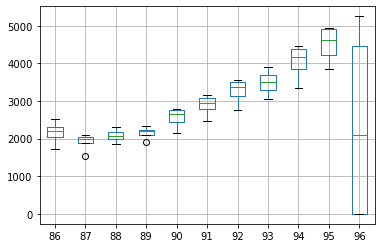

In [9]:
df.boxplot()

#### We see that there are outliers during the years 87 and 89

In [10]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4)'>

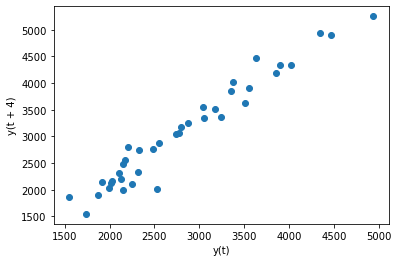

In [11]:
lag_plot(series,lag=4)

#### Here we see how each quarter affects the same quarter of the next year

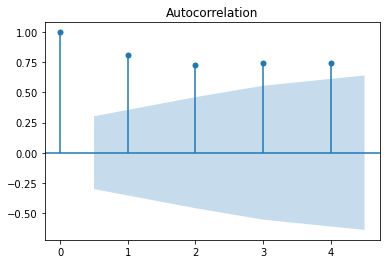

In [12]:
acf=plot_acf(series,lags=4)

### Splitting of data

In [38]:
train = series.head(9*4)
test = series.tail(6)

## Smoothening techniques 

### Moving Average

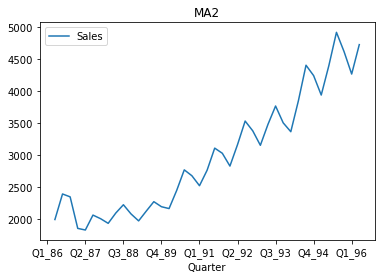

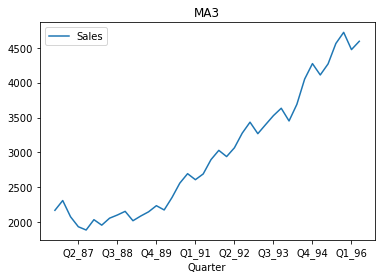

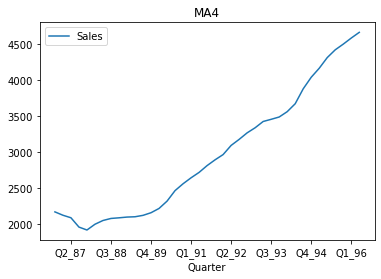

In [14]:
for i in range(2,5):
    series.rolling(i).mean().plot()
    plt.title("MA"+str(i))
    plt.show()

### Time series decomposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

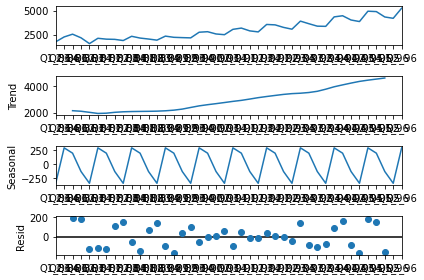

In [16]:
sd=seasonal_decompose(series,period=4)
sd.plot()
plt.show()

### Here we see that there is a constant increasing trend and seasonality component remains almost constant with some prominent changes within each season

### ACF and PACF plots

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

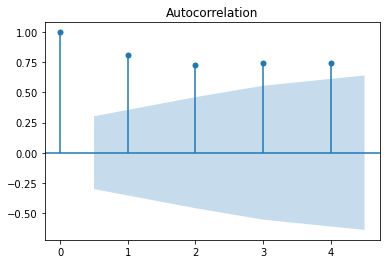

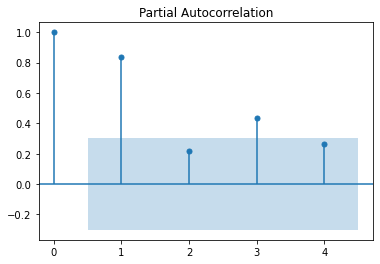

In [18]:
acf = plot_acf(series,lags=4)
acf=plot_pacf(series,lags=4)

### Here we see that each quarter is related to the same quarter of next year

## Building the models

In [44]:
import numpy as np
test.set_index(np.arange(1,7),inplace=True)


### Simple Exponential Smoothening

In [71]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses = SimpleExpSmoothing(train["Sales"]).fit()
pred = ses.predict(start=test.index[0],end=test.index[-1])
sqrt(mse(test.Sales,pred))

2562.9181796712323

### Holts method

In [75]:
from statsmodels.tsa.holtwinters import Holt
ses = Holt(train["Sales"]).fit()
pred = ses.predict(start=test.index[0],end=test.index[-1])
sqrt(mse(test.Sales,pred))

2445.3012042974924

### Holts winters method with additive trend and additive seasonality

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ses = ExponentialSmoothing(train["Sales"],trend='add',seasonal='add',seasonal_periods=4).fit()
pred = ses.predict(start=test.index[0],end=test.index[-1])
sqrt(mse(test.Sales,pred))

2355.3278360989843

### Holts winters method with additive trend and multiplicative seasonality

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ses = ExponentialSmoothing(train["Sales"],trend='add',seasonal='mul',seasonal_periods=4).fit()
pred = ses.predict(start=test.index[0],end=test.index[-1])
sqrt(mse(test.Sales,pred))

2460.6163472691014

### Naive model( Pt+1=yt)

In [19]:
history = [x for x in train.Sales]
pred = []
for i in range(6):
    pred.append(history[-1])
    history.append(test.Sales[i])
pred

[4017.0, 3854.0, 4936.0, 4895.0, 4333.0, 4194.0]

In [20]:
list(test.Sales)

[3854.0, 4936.0, 4895.0, 4333.0, 4194.0, 5253.0]

In [21]:
rmse = sqrt(mse(list(test.Sales),pred))
rmse

665.2844003381812

### ARIMA model

In [22]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [27]:
def arima_model(val,orde):
    history = [x for x in train.Sales]
    val = list(val)
    pred = []
    for i in range(len(val)):
        arim_model = ARIMA(history,order=orde).fit()
        forecast=arim_model.forecast()[0]
        history.append(val[i])
        pred.append(forecast)
    rmse = sqrt(mse(list(test.Sales),pred))
    return rmse

In [33]:
brmse = 10000
for p in range(5):
    for d in range(5):
        for q in range(5):
            try:
                rmse=arima_model(test.Sales,(p,d,q))
                print()
                if rmse<brmse:
                    brmse = rmse
                    bord = (p,d,q)
            except:
                continue
            print((p,d,q)," Root mean square error is: ",rmse)
print("="*10)
print(bord," Best Root mean square error is: ",brmse)


(0, 0, 0)  Root mean square error is:  1800.5020677668397

(0, 0, 1)  Root mean square error is:  1233.3329980121166

(0, 0, 2)  Root mean square error is:  786.8821539104443

(0, 0, 3)  Root mean square error is:  941.7218381479032

(0, 0, 4)  Root mean square error is:  537.3424039776863

(0, 1, 0)  Root mean square error is:  654.3066722515341

(0, 1, 1)  Root mean square error is:  577.4604059476726

(0, 1, 2)  Root mean square error is:  555.598220093313

(0, 1, 3)  Root mean square error is:  476.8245200116938

(0, 1, 4)  Root mean square error is:  367.78229565832

(0, 2, 0)  Root mean square error is:  906.0868072809203

(0, 2, 1)  Root mean square error is:  669.7505213806769

(0, 2, 2)  Root mean square error is:  573.9692439236421

(1, 0, 0)  Root mean square error is:  708.320340449912

(1, 0, 1)  Root mean square error is:  630.7251715615841

(1, 0, 2)  Root mean square error is:  602.062898504503

(1, 0, 3)  Root mean square error is:  3014.4320840606183

(1, 1, 0)  Root

# Creating the best ARIMA model

In [84]:
history = [x for x in train.Sales]
pred=[]
val = list(test.Sales)
for i in range(len(val)):
        arim_model=ARIMA(history,order=(0,1,4)).fit()
        forecast = arim_model.forecast()[0]
        history.append(val[i])
        pred.append(forecast)

Text(0, 0.5, 'Coca Cola prices')

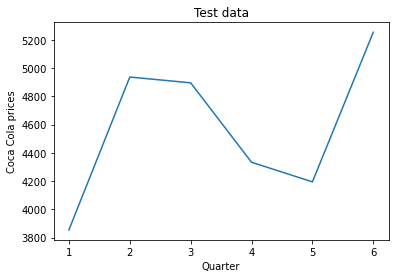

In [98]:
test.Sales.plot()
plt.title("Test data")
plt.xlabel("Quarter")
plt.ylabel("Coca Cola prices")

Text(0, 0.5, 'Coca Cola prices')

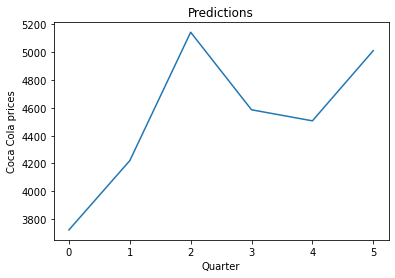

In [97]:
plt.plot(pred)
plt.title("Predictions")
plt.xlabel("Quarter")
plt.ylabel("Coca Cola prices")